In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
import pandas as pd
import numpy as np
import sklearn.metrics as mtr
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


def importMonkDataset(file_name:str) -> pd.DataFrame:
    dataset = None
    columns_name = ["Y"] + [f"X{i}" for i in range(1,7)] + ["ID"]
    try:
        dataset = pd.read_csv(file_name, sep=" ", names=columns_name)
    except Exception as e:
        print("Error | Parsing target dataset for validation!")
        print(e)
    dataset.set_index('ID', inplace=True)
    return dataset

def takeMonkInputDataset(dataset:pd.DataFrame) -> pd.DataFrame:
    return dataset.iloc[:, 1:] #Return dataset without first and last column
 
def takeMonkOutputDataset(dataset:pd.DataFrame) -> pd.DataFrame:
    return dataset.iloc[:,[0]] #Return dataset with only first column

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

def convert_x(x_train: np.ndarray):
    dict_3 = {1: [1, 0, 0], 2: [0, 1, 0], 3: [0, 0, 1]}
    dict_2 = {1: [1, 0], 2: [0, 1]}
    dict_4 = {1: [1, 0, 0, 0], 2: [0, 1, 0, 0], 3: [0, 0, 1, 0], 4: [0, 0, 0, 1]}

    new_x = []

    for row in x_train:
        new_row = []
        for j, value in enumerate(row):
            if j in [0, 1, 3]:
                new_row.extend(dict_3.get(value))
            elif j in [2, 5]:
                new_row.extend(dict_2.get(value))
            elif j == 4:
                new_row.extend(dict_4.get(value))

        new_x.append(new_row)
        print(new_row)
    return new_x


# # Definisci la funzione per plottare la curva di apprendimento
# def plot_learning_curve(estimator, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
#     plt.figure()
#     plt.title("Learning Curve")
#     if ylim is not None:
#         plt.ylim(*ylim)
#     plt.xlabel("Training examples")
#     plt.ylabel("Score")

#     train_sizes, train_scores, test_scores = learning_curve(
#         estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)

#     plt.grid()

#     plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.1,
#                      color="r")
#     plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
#     plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
#              label="Training score")
#     plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
#              label="Cross-validation score")

#     plt.legend(loc="best")
#     return plt



[1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0]
[1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1]
[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0]
[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1]
[1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0]
[1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1]
[1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0]
[1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0]
[1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1]
[1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1]
[1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0]
[1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1]
[1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0]
[1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1]
[1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1]
[1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1]
[1, 0, 0, 0,

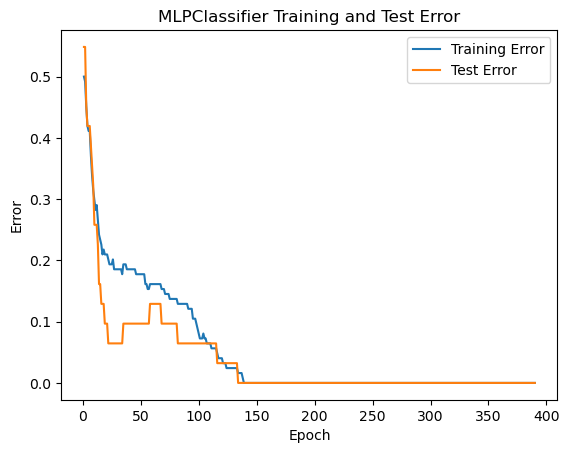

[array([[ 1.27065037,  2.13805987,  2.27287221],
       [-1.89481539,  0.48516562, -2.53342484],
       [-1.35583888, -2.18286309,  0.6198606 ],
       [ 1.48336453,  3.10241928, -1.89264925],
       [-0.58342598, -2.66161974,  2.80845045],
       [-0.67093246, -0.03471731, -0.09593443],
       [ 0.20262002,  0.18145992, -1.05301244],
       [ 0.20687199,  0.25726711, -0.97427633],
       [-0.08305501,  0.07926745, -0.36844859],
       [-0.30171687,  0.32526246, -0.32803993],
       [-0.20341406,  0.27575035, -0.3162901 ],
       [ 2.29812725, -1.22105768, -0.89088999],
       [-1.49298401,  1.33238613,  0.57515835],
       [-1.22847037,  1.44133415,  0.57764296],
       [-1.3255246 ,  1.14263574,  0.80803438],
       [-0.08647256, -0.4289832 , -1.01299468],
       [-0.37919814, -0.46019134, -1.14234931]]), array([[ 3.25519971],
       [-3.24740887],
       [-3.17708007]])]


In [2]:
dataset_train = importMonkDataset("MONK/monks-1.train")
random_seed = 39

# activation: tanh, relu
# solver: sgd, adam
# lr: 0.01, 0.001, 0.05, 0.005
# iter: 350, 400
# alpha: 0.0001, 0.001, 0.0005, 0.005
# layers: 2, 3, 4

parameters = {'activation':('tanh', 'relu'), 'solver':('sgd', 'adam')}


# Angolo, Setpoint, Velocita
#

mlp = MLPClassifier(activation="tanh",solver="adam",hidden_layer_sizes=(3),learning_rate_init=0.01,max_iter=390,random_state=random_seed)
#mlp = MLPRegressor(activation="logistic",solver="sgd",hidden_layer_sizes=(3),learning_rate_init=0.01,max_iter=390, batch_size=10)



# x1: head shape   ---> round, square, octagon      
# x2: body shape   ---> round, square, octagon
# x3: is smiling   ---> yes, no                     
# x4: holding      ---> sword, balloon, flag
# x5: jacket color ---> red, yellow, green, blue
# x6: has tie      ---> yes, no

X = takeMonkInputDataset(dataset_train)
X = X.to_numpy()

Y = takeMonkOutputDataset(dataset_train)
Y = np.ravel(Y)

X = convert_x(X)



x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=random_seed)

train_errors = []
test_errors = []

#mlp.fit(X,Y)

for epoch in range(1,mlp.max_iter + 1):
    mlp.partial_fit(X, Y, classes=np.unique(y_train))
    
    y_train_pred = mlp.predict(X)
    #y_train_pred = (y_train_pred > 0.5).astype(float)
    train_errors.append(1 - accuracy_score(Y, y_train_pred))

    y_test_pred = mlp.predict(x_test)
    #y_test_pred = (y_test_pred > 0.5).astype(float)
    test_errors.append(1 - accuracy_score(y_test, y_test_pred))


plt.plot(range(1, mlp.max_iter + 1), train_errors, label='Training Error')
plt.plot(range(1, mlp.max_iter + 1), test_errors, label='Test Error')
plt.title('MLPClassifier Training and Test Error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.show()

print(mlp.coefs_)




In [3]:
dataset_test = importMonkDataset("MONK/monks-1.test")

x_test = takeMonkInputDataset(dataset_test)
y_test = takeMonkOutputDataset(dataset_test)
x_test = x_test.to_numpy()

new_x_test = convert_x(x_test)

y_test_np = np.ravel(y_test)

y_predict = mlp.predict(new_x_test)

[1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]
[1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1]
[1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0]
[1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1]
[1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0]
[1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1]
[1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0]
[1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1]
[1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0]
[1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1]
[1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0]
[1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1]
[1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0]
[1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1]
[1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0]
[1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1]
[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]
[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1]
[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0]
[1, 0, 0, 1,

In [4]:
y_predict = (y_predict > 0.5).astype(float)
accuracy = mtr.accuracy_score(y_test_np,y_predict)

print(mtr.classification_report(y_test_np,y_predict))
print(mtr.confusion_matrix(y_test_np,y_predict))

print(accuracy)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       216
           1       1.00      1.00      1.00       216

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432

[[216   0]
 [  0 216]]
1.0


In [5]:

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
plot_learning_curve(mtr, X, Y, cv=cv, n_jobs=-1)

plt.show()


TypeError: plot_learning_curve() missing 1 required positional argument: 'y'